In [63]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pickle
from scipy.optimize import curve_fit

from utils import downloadData
from utils import dataProc

In [24]:
#Using Pickle to save time during data loading
read = 0
if read:
    data = dataProc.dataProc()
    df = data.loadData()
    df_dict = data.cleanData(df)
    with open('df_dict.pickle', 'wb') as handle:
        pickle.dump(df_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('df_dict.pickle', 'rb') as handle:
    df_dict = pickle.load(handle)

In [25]:
# Missing step from cleanData
for i in df_dict.keys():
    df_dict[i]=df_dict[i].dropna(axis=1, thresh=5) #delete rows with just nan values
    df_dict[i].columns = df_dict[i].columns.str.replace(' ', '') 

In [26]:
#extract all production data in a single df 
df = {}
for i in df_dict.keys():
    df_temp = df_dict[i].groupby('campo').sum() # Grouping as needed
    January =  df_temp.columns.get_loc('enero')# picking the group first month location
    if (i == '2014'):
        df_temp['noviembre'] = 0.0
        df_temp['diciembre'] = 0.0
    df[i] = df_temp.loc[:, 'enero'::]# Assign clean table

In [114]:
campo = "curito"

production = np.array([])
dates = pd.date_range(f'{i}-01-01', periods=0, freq='M')

#Actual data
for i in df.keys():
    dates = np.append(dates, pd.date_range(f'{i}-01-01', periods= df[i].loc[campo,:].size, freq='M'))
    production = np.append(production, df[i].loc[campo,:])

# Arps, hyperbolic, b = 0.5
# Decline rate, D, in hyperbolic is not constant ( D = - 1/q * dq/dt ) but the initial Di can be obtained

b_arps = 0.5
max_prod = np.max(production)
a = np.where(production == max_prod)[0][0]
t_data  = dates[a::]
y_data = production[a::]

#Optimizing decline rate
def rate_arps_hyp(times, Di):
    global production, b_arps, max_prod
    t = np.arange(times.size)
    q = max_prod/(1. + b*Di*t)**(1/b_arps)
    return q

def decline_rate(times, Di):
    global b_arps
    t = np.arange(times.size)
    D = Di / (1+b_arps*Di*t)
    return D

Di_opt, Di_cov = curve_fit(rate_arps_hyp, x_data, y_data)

Arps equation for Hyperbolic rate:\\

$ q(t) = q_i / (1.0 + b D_i t)^\frac{1}{b}$

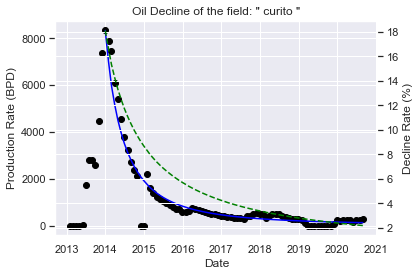

In [117]:

fig = plt.figure()
ax1 = plt.axes()
ax1.set_xlabel('Date')
ax1.set_ylabel('Production Rate (BPD)')
ax1.set_title(f'Oil Decline of the field: " {campo} "')

ax1.plot(dates, production,'o', color = 'black', label = 'Actual data')
ax1.plot(t_data, rate_arps_hyp(t_data, Di_opt),'-', color = 'blue', label = 'Arps')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax.set_xlabel('Date')
ax2.set_ylabel('Monthly Decline Rate (%)')
ax2.plot(t_data, decline_rate(t_data, Di_opt)*100,'--', color = 'green', label = 'Decline rate')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [97]:
print(df['2016'].index.tolist())

['abanico', 'abarco', 'abejas', 'acacia este', 'acae-san miguel (pto colon)', 'acordionero', 'adalia', 'aguas blancas', 'akacias', 'akira', 'alepe', 'almagro', 'altair', 'alva sur', 'ambar', 'ambrosia', 'andalucia sur', 'andarrios', 'apamate', 'apiay', 'apiay este', 'araguato', 'arauca', 'arauco', 'ardilla', 'area teca-cocorna', 'arrayan', 'atarraya', 'aullador', 'austral', 'avispa', 'azor', 'bacano', 'balcon', 'bandola', 'barquereña', 'bastidas', 'baul', 'bayonero', 'bazar', 'begonia', 'boa', 'bolivar', 'bonanza', 'boquete', 'bototo', 'brisas', 'bullerengue', 'cabiona', 'caipal', 'calona', 'camoa', 'campo rico', 'canaguay', 'canaguey', 'candalay', 'candelilla', 'capella', 'capure', 'caracara sur a', 'caracara sur b y c', 'caramelo', 'careto', 'caribe', 'caricare', 'carmentea', 'caronte', 'carrizales', 'carupana', 'caruto', 'casabe', 'casabe sur', 'castilla', 'castilla este', 'castilla norte', 'caño gandul', 'caño garza', 'caño garza este', 'caño garza norte', 'caño limon', 'caño rondo

array([0.01409853])